In [1]:
import pandas, os
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
x = os.listdir()

AtList = []

for line in x:
    if "Atiku." in line:
        AtList.append(line)

In [3]:
import pandas

name, tweet, time, location, followers, friends, status_count = [], [], [], [], [], [], []
for item in AtList:
    print("Processing " + item + " ...")        
    df = pandas.read_json(item, lines = True)

    #Get Screen name
    for line in df.user:
        n = line.get('screen_name')
        name.append(n)
        
    #Get Tweet removing all non-characters
    for line in df.text:
        t = str(line).lower()
        t.replace('[^a-zA-Z]', '')
        tweet.append(t)
    
    #Get time
    for line in df.created_at:
        time.append(line)
    
    #Get Location converting to lowercase
    for line in df.user:
        x = line.get('location')
        x = str(x).lower()
        location.append(x)

    #Get Followers
    for line in df.user:
        f = line.get('followers_count')
        followers.append(f)

    #Get Friends
    for line in df.user:
        fr = line.get('friends_count')
        friends.append(fr)

    #Get Status count
    for line in df.user:
        s = line.get('statuses_count')
        status_count.append(s)
    print(item + " done!")
    
    #Get device type
devices=df["source"]
OriginDevice=[]
android=0
iOS=0
other=0
for line in devices:
    if "android" in line:
        android = android+1
        OriginDevice.append("android")
    elif "iphone" in line:
        iOS +=1
        OriginDevice.append("iOS")           
    elif "ipad" in line:
        iOS +=1
        OriginDevice.append("iOS")
    else:
        other += 1
        OriginDevice.append("other")


#Build into a df
TweetI = pandas.DataFrame(columns=('name','location', 'tweet','friends', 'followers', 'status_count'))

TweetI["name"] = name
TweetI["location"] = location
TweetI['tweet'] = tweet
TweetI['time'] = time
TweetI['device_type'] = OriginDevice
TweetI["friends"]= friends
TweetI['followers'] = followers
TweetI['status_count'] = status_count


Processing Atiku.json ...
Atiku.json done!


In [4]:
TweetI.shape

(7984, 8)

In [5]:
locations = [line for line in TweetI.location if 'none' not in line]

In [6]:
#Top Locations speaking
locations.sort(reverse=False)
locations_table = pandas.DataFrame(locations, columns=["locations"])
locations_table.head()

,locations
0,"\nlagos, nigeria"
1,"\nlagos, nigeria"
2,"\nlagos, nigeria"
3,
4,"""cogito, ergo sum"""


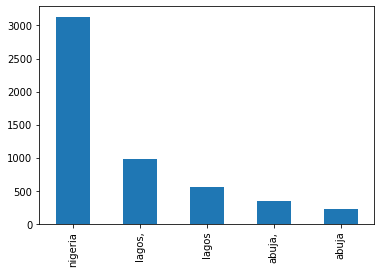

In [7]:
loc = pandas.Series(' '.join(locations_table['locations']).split()).value_counts()[:5]
loc.plot.bar()

In [8]:
def get_sentiment(df):
    """
    Sentiment analysis with TextBlob. Plot will take into account only the pos and neg
    Result will be plugged back into the dataframe adding columns for sentiment.
    """
    polarity = 0
    positive = 0
    negative = 0
    neutral = 0
    sentiment = []

    for tweet in df.tweet:
        analysis=TextBlob(str(tweet))
        polarity += analysis.sentiment.polarity
        if (analysis.sentiment.polarity == 0):
            neutral += 1
            sentiment.append("neutral")
        elif (analysis.sentiment.polarity < 0.00):
            negative += 1
            sentiment.append("negative")
        elif (analysis.sentiment.polarity > 0.00):
            positive += 1
            sentiment.append("positive")
    
        #Show summary
    print("positive tweets are: " + str(positive))
    print("negative tweets are: " + str(negative))
    print("neutral tweets are: " + str(neutral))
    print("A total of {} was analysed.".format(positive+negative+neutral))
    
    #Plotting 1
    #Data to Plot
    labels = 'Positive', 'Negative'
    sizes = [positive, negative]
    colors = ['green', 'brown']
    explode = (0.1, 0)  # explode 1st slice

    # Plot
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,shadow=True, startangle=140)
    plt.axis('equal')
    plt.title("Sentiment Analysis Result")
    plt.show()

    df["sentiments"] = sentiment
    return df

positive tweets are: 1757
negative tweets are: 1490
neutral tweets are: 4737
A total of 7984 was analysed.


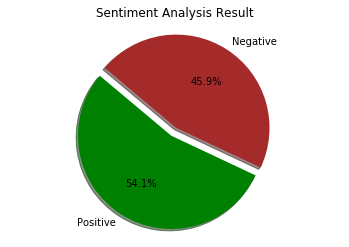

In [9]:
n_TweetI = get_sentiment(TweetI)

In [10]:
n_TweetI

,name,location,tweet,friends,followers,status_count,time,device_type,sentiments
0,bayonuels,"oyo, nigeria",rt @rasheedfuggi: english: we are dead! abubak...,7015,6428,29310,2019-10-30 14:51:23+00:00,android,negative
1,geo_geomoney,"lagos, nigeria",to hell with atiku!!!\nto hell to @officialpdp...,754,783,6459,2019-10-30 14:51:23+00:00,android,neutral
2,mahmud19971,birmingham x abuja,rt @abdulmahmud01: judge who? you guys are the...,325,244,11869,2019-10-30 14:51:24+00:00,iOS,positive
3,Irisali14,abuja nigeria,@daily_trust @mbuhari https://t.co/zkvoweowfa,453,83,1799,2019-10-30 14:51:25+00:00,other,neutral
4,segilolaa,lagos,rt @officialapcng: with the ruling of the supr...,1153,5109,59768,2019-10-30 14:51:26+00:00,android,neutral
...,...,...,...,...,...,...,...,...,...
7979,OmareDorsu,"warri, nigeria",rt @fkeyamo: congratulations nigeria! all the ...,793,166,10565,2019-10-30 16:45:57+00:00,android,positive
7980,WuBila01,"abuja, nigeria.",rt @mobilepunch: supreme court judgment: accep...,1491,252,3141,2019-10-30 16:45:57+00:00,android,positive
7981,B1OLA,none,lol. as expected.,1611,4427,186853,2019-10-30 16:45:57+00:00,android,positive
7982,almaleek50,the gambia,rt @theresatekenah: buhari has a certificate b...,5002,972,11678,2019-10-30 16:46:00+00:00,android,negative


# NLP

In [11]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#See if there are other words we want to add to drop words by looking at the freq words in the tweets by 
#dentifying the 20 most common words
freq = pandas.Series(' '.join(n_TweetI['tweet']).split()).value_counts()[:20]
freq

the        6662
rt         4826
supreme    2841
court      2818
to         2564
atiku      2491
of         2161
and        1848
@atiku     1845
is         1764
you        1421
in         1417
has        1368
a          1274
that       1055
appeal      998
i           984
not         931
for         898
about       872
dtype: int64

In [13]:
##Creating a list of stop words
stop_words = stopwords.words("english")

In [14]:
#Add more words to stopwords from own frequency output
stop_words.append("rt")

In [15]:
#Identify the top discussion drivers
tweets = [line for line in n_TweetI.tweet]
rts = [line.lower() for line in tweets if 'rt' in line] #get all retweets
influencers = [line.split(":")[0] for line in rts] #isolate the handles retweeted

In [16]:
influencers_sorted = [line for line in influencers if line.startswith("rt")]
influencers_sorted.sort(reverse=False)
influencers_sorted
influencers_table = pandas.DataFrame(influencers_sorted, columns=["influencers"])
influencers_table.head()

,influencers
0,rt @1stofhissname
1,rt @1stofhissname
2,rt @1stofhissname
3,rt @1stofhissname
4,rt @1stofhissname


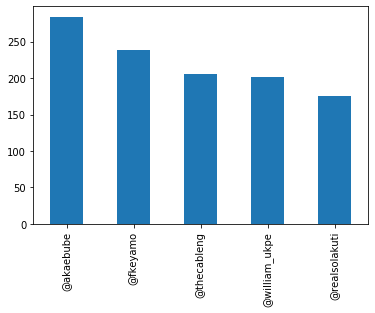

In [17]:
infl = pandas.Series(' '.join(influencers_table['influencers']).split()).value_counts()[1:6] #drop first one 'rt'
infl.plot.bar()

In [18]:
#Clean up. We will take the tweets alone as a list
tweets = [line for line in n_TweetI.tweet]

#Remove links
split_tweets = []
for tweet in tweets:
    #print(tweet.split())
    split_tweets.append([line for line in tweet.split() if not line.startswith("htt") ])

#Assemble the tweets back from their split state
assy_tweets = [' '.join(line) for line in split_tweets]
    
corpus = [] #variable to hold our cleaned tweets
for i in range(0, len(assy_tweets)):
    #Remove punctuations. Removes all characters NOT a-z or A-Z or 0-9 and replace with nothing ie ' ' note: carat inside the []
    text = re.sub('[^a-zA-Z + 0-9]', ' ', assy_tweets[i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation + stopwords removal
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [19]:
#add to datraframe
n_TweetI["cleaned_tweets"] = corpus
n_TweetI.head(2)

,name,location,tweet,friends,followers,status_count,time,device_type,sentiments,cleaned_tweets
0,bayonuels,"oyo, nigeria",rt @rasheedfuggi: english: we are dead! abubak...,7015,6428,29310,2019-10-30 14:51:23+00:00,android,negative,rasheedfuggi english dead abubakar yoruba atik...
1,geo_geomoney,"lagos, nigeria",to hell with atiku!!!\nto hell to @officialpdp...,754,783,6459,2019-10-30 14:51:23+00:00,android,neutral,hell atiku hell officialpdpnig congratulation ...


In [20]:
#Rename columns so we can use get_sentiment func
n_TweetI = n_TweetI.rename(columns = {'text':'noClean_tweet'})
n_TweetI = n_TweetI.rename(columns = {'cleaned_tweets':'text'})
n_TweetI.head(2)

,name,location,tweet,friends,followers,status_count,time,device_type,sentiments,text
0,bayonuels,"oyo, nigeria",rt @rasheedfuggi: english: we are dead! abubak...,7015,6428,29310,2019-10-30 14:51:23+00:00,android,negative,rasheedfuggi english dead abubakar yoruba atik...
1,geo_geomoney,"lagos, nigeria",to hell with atiku!!!\nto hell to @officialpdp...,754,783,6459,2019-10-30 14:51:23+00:00,android,neutral,hell atiku hell officialpdpnig congratulation ...


In [ ]:
cleaned_Tweets = get_sentiment(n_TweetI)

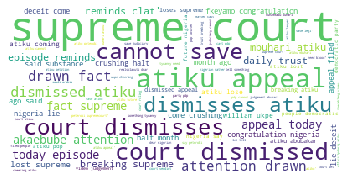

In [22]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("AtikuSupremeCourt.png", dpi=900)